In [1]:
from mylib.statistic_test import *

code_id = '0313 - Conditional Probability for Field Maintain'
loc = os.path.join(figpath, code_id, 'Quality Control')
mkdir(loc)

pass

d:\Software\Anaconda3\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\0313 - Conditional Probability for Field Maintain\Quality Control is already existed!


In [ ]:
if os.path.exists(join(figdata, f'{code_id} [Quality SNR].pkl')):
    with open(join(figdata, f'{code_id} [Quality SNR].pkl'), 'rb') as handle:
        SNRData = pickle.load(handle)
else:
    SNRData = DataFrameEstablish(variable_names = [
                             'Duration', 'SNR Level', 'SNR Value for Retention', 'SNR Value for Recovery', 
                             'Conditional Prob.', 'Conditional Recover Prob.', 'Paradigm'], 
                             file_idx=np.where(f_CellReg_modi['Type'] == 'Real')[0],
                             f = f_CellReg_modi, function = ConditionalProb_Interface_Control, 
                             file_name = f'{code_id} [Quality SNR]', behavior_paradigm = 'CrossMaze'
           )


  0%|          | 0/22 [00:00<?, ?it/s]d:\Software\Anaconda3\envs\maze\lib\site-packages\mylib\Interfaces.py:2244: RuntimeWarning: Mean of empty slice
  return np.digitize(np.nanmean(snr, axis=0), boundaries)
d:\Software\Anaconda3\envs\maze\lib\site-packages\mylib\field\field_tracker.py:297: RuntimeWarning: Mean of empty slice
  label_val_off[(j-i-1, l)].append(np.nanmean(labeled_matrix[i:j, :][:, non_recover_num[non_recover_label == l]], axis=0))
d:\Software\Anaconda3\envs\maze\lib\site-packages\mylib\field\field_tracker.py:299: RuntimeWarning: invalid value encountered in divide
  retained_prob = on_next_prob[:, 0, :] / np.sum(on_next_prob, axis=1)
d:\Software\Anaconda3\envs\maze\lib\site-packages\mylib\field\field_tracker.py:300: RuntimeWarning: invalid value encountered in divide
  conditional_recover_prob = off_next_prob[:, 0, :] / np.sum(off_next_prob, axis=1)
d:\Software\Anaconda3\envs\maze\lib\site-packages\mylib\field\field_tracker.py:316: RuntimeWarning: Mean of empty slice
  

(1580,)


(457,) (231,)
  Mean: 85.45139189343296, STD: 12.637788497980374, Max: 100.0, Min: 43.1712962962963, Median: 89.04109589041096, df: 456


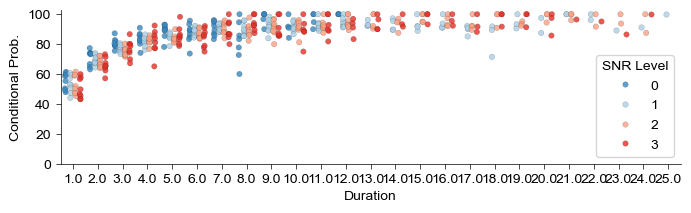

Dur 1: F_onewayResult(statistic=0.9021662288960933, pvalue=0.45248711369368466)
Dur 2: F_onewayResult(statistic=1.9375074876917169, pvalue=0.1464349336720752)
Dur 3: F_onewayResult(statistic=2.731094151427239, pvalue=0.062634113155232)
Dur 4: F_onewayResult(statistic=0.2223113764248951, pvalue=0.8800753395059244)
Dur 5: F_onewayResult(statistic=1.9123120851330964, pvalue=0.15050190555288387)
Dur 6: F_onewayResult(statistic=0.8403144767492332, pvalue=0.48329431239218823)
Dur 7: F_onewayResult(statistic=0.1992501769606625, pvalue=0.8960091273882747)
Dur 8: F_onewayResult(statistic=2.9028093241323463, pvalue=0.053833330553959835)
Dur 9: F_onewayResult(statistic=1.8997266624385374, pvalue=0.15661948811444726)
Dur 10: F_onewayResult(statistic=0.2687042172682769, pvalue=0.8472410312746407)
Dur 11: F_onewayResult(statistic=0.7222161813618225, pvalue=0.5494460812744135)


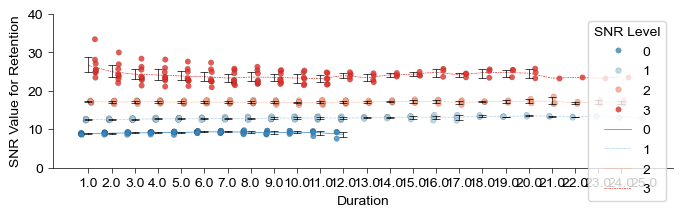

In [21]:
#Data['hue'] = np.array([Data['Papadigm'][i] + ' ' + Data['Maze Type'][i] for i in range(Data['Duration'].shape[0])])
idx = np.where((np.isnan(SNRData['Conditional Prob.']) == False))[0]
SubData = SubDict(SNRData, SNRData.keys(), idx=idx)

idx1 = np.where(SubData['Paradigm'] == 'MA')[0]
idx2 = np.where(SubData['Paradigm'] == 'MB')[0]
print(idx1.shape, idx2.shape)
print_estimator(SubData['Conditional Prob.'][idx1])

SubData_ma = SubDict(SubData, SubData.keys(), idx=idx1)
fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData_ma,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))
plt.savefig(join(loc, "SNR - Retention Prob [MA].png"), dpi=600)
plt.savefig(join(loc, "SNR - Retention Prob [MA].svg"), dpi=600)
plt.show()
for dur in range(1, 12):
    values = [SubData_ma['Conditional Prob.'][(SubData_ma['SNR Level'] == snr) & (SubData_ma['Duration'] == dur)] for snr in range(4)]
    print(f"Dur {dur}: {f_oneway(*values)}")

fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'SNR Value for Retention',
    data=SubData_ma,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1,
    zorder=1
)
SubData_ma['Duration']-= 1
sns.lineplot(
    x = 'Duration',
    y = 'SNR Value for Retention',
    data=SubData_ma,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    style = "SNR Level",
    err_style="bars",
    linewidth=0.5,
    err_kws={"capsize":3, 'capthick':0.5, 'elinewidth':0.5, 'ecolor':'k'},
    zorder=2,
)
ax.set_ylim(0, 40)
ax.set_yticks(np.linspace(0, 40, 5))
plt.savefig(join(loc, "SNR - Retention SNR [MA - Sample SNRs].png"), dpi=600)
plt.savefig(join(loc, "SNR - Retention SNR [MA - Sample SNRs].svg"), dpi=600)
plt.show()

# MB

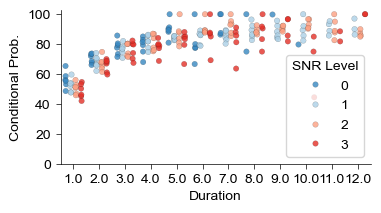

Dur 1: F_onewayResult(statistic=2.8004344939761365, pvalue=0.06635488553618876)
Dur 2: F_onewayResult(statistic=1.2589237463506684, pvalue=0.3152248897368594)
Dur 3: F_onewayResult(statistic=0.249614106316134, pvalue=0.8606456953988605)
Dur 4: F_onewayResult(statistic=0.5871676146722141, pvalue=0.6304493967244249)
Dur 5: F_onewayResult(statistic=2.1155931253096023, pvalue=0.13026803111901827)
Dur 6: F_onewayResult(statistic=1.3617351063126397, pvalue=0.2862353998315305)
Dur 7: F_onewayResult(statistic=3.13326110656116, pvalue=0.05289079741344554)
Dur 8: F_onewayResult(statistic=0.024215838809090586, pvalue=0.9946614759834876)
Dur 9: F_onewayResult(statistic=1.5773183364548722, pvalue=0.24622083903600558)


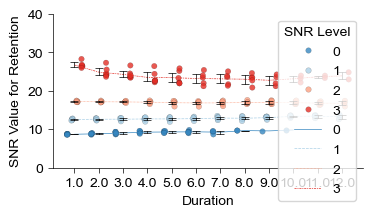

In [23]:
SubData_mb = SubDict(SubData, SubData.keys(), idx=idx2)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Prob.',
    data=SubData_mb,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1,
    zorder=1
)
ax.set_ylim(0, 103)
ax.set_yticks(np.linspace(0, 100, 6))
plt.savefig(join(loc, "SNR - Retention Prob [MB].png"), dpi=600)
plt.savefig(join(loc, "SNR - Retention Prob [MB].svg"), dpi=600)
plt.show()
for dur in range(1, 10):
    values = [SubData_mb['Conditional Prob.'][(SubData_mb['SNR Level'] == snr) & (SubData_mb['Duration'] == dur)] for snr in range(4)]
    print(f"Dur {dur}: {f_oneway(*values)}")

fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'SNR Value for Retention',
    data=SubData_mb,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.1,
    zorder=1
)
SubData_mb['Duration']-= 1
sns.lineplot(
    x = 'Duration',
    y = 'SNR Value for Retention',
    data=SubData_mb,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    style = "SNR Level",
    err_style="bars",
    linewidth=0.5,
    err_kws={"capsize":3, 'capthick':0.5, 'elinewidth':0.5, 'ecolor':'k'},
    zorder=2,
)
ax.set_ylim(0, 40)
ax.set_yticks(np.linspace(0, 40, 5))
plt.savefig(join(loc, "SNR - Retention SNR [MB - Sample SNRs].png"), dpi=600)
plt.savefig(join(loc, "SNR - Retention SNR [MB - Sample SNRs].svg"), dpi=600)
plt.show()

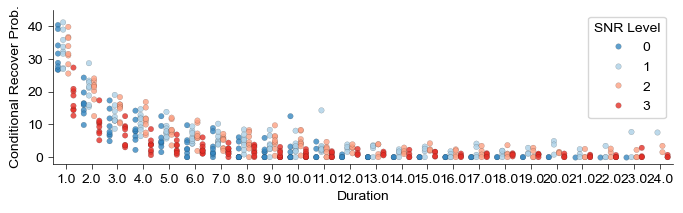

Dur 1: F_onewayResult(statistic=17.23797744798772, pvalue=1.546307403857536e-06)
Dur 2: F_onewayResult(statistic=13.015574808058359, pvalue=1.6613339966890964e-05)
Dur 3: F_onewayResult(statistic=7.288139323149369, pvalue=0.000925781538323104)
Dur 4: F_onewayResult(statistic=9.959120123023435, pvalue=0.00012342170223557196)
Dur 5: F_onewayResult(statistic=6.26225668803049, pvalue=0.0021749057181255707)
Dur 6: F_onewayResult(statistic=5.724324565130361, pvalue=0.003473396108235739)
Dur 7: F_onewayResult(statistic=4.157585023183996, pvalue=0.014816866364678112)
Dur 8: F_onewayResult(statistic=4.007544729060903, pvalue=0.01714791207759713)
Dur 9: F_onewayResult(statistic=5.385000154092094, pvalue=0.0048948535132470735)
Dur 10: F_onewayResult(statistic=2.731407287821795, pvalue=0.06338140958518111)
Dur 11: F_onewayResult(statistic=2.179076625879324, pvalue=0.11921631810006919)


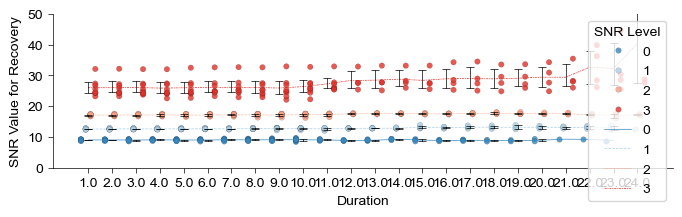

In [35]:
idx0 = np.where((np.isnan(SNRData['Conditional Recover Prob.']) == False) & (SNRData['Paradigm'] == 'MA'))[0]
SubData_ma = SubDict(SNRData, SNRData.keys(), idx=idx0)
fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData_ma,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.0,
    zorder=1
)
ax.set_ylim(-2, 45)
ax.set_yticks(np.linspace(0, 40, 5))
plt.savefig(join(loc, "SNR - Recovery Prob [MA].png"), dpi=600)
plt.savefig(join(loc, "SNR - Recovery Prob [MA].svg"), dpi=600)
plt.show()

for dur in range(1, 12):
    values = [SubData_ma['Conditional Recover Prob.'][(SubData_ma['SNR Level'] == snr) & (SubData_ma['Duration'] == dur)] for snr in range(4)]
    print(f"Dur {dur}: {f_oneway(*values)}")
    
fig = plt.figure(figsize=(8, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'SNR Value for Recovery',
    data=SubData_ma,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.0,
    zorder=1
)
SubData_ma['Duration']-= 1
sns.lineplot(
    x = 'Duration',
    y = 'SNR Value for Recovery',
    data=SubData_ma,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    style = "SNR Level",
    err_style="bars",
    linewidth=0.5,
    err_kws={"capsize":3, 'capthick':0.5, 'elinewidth':0.5, 'ecolor':'k'},
    zorder=2,
)
ax.set_ylim(0, 50)
ax.set_yticks(np.linspace(0, 50, 6))
plt.savefig(join(loc, "SNR - Recovery SNR [MA - Sample SNRs].png"), dpi=600)
plt.savefig(join(loc, "SNR - Recovery SNR [MA - Sample SNRs].svg"), dpi=600)
plt.show()

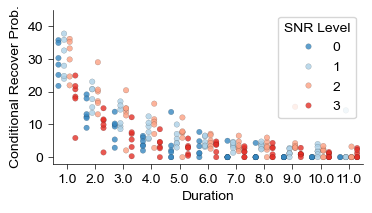

Dur 1: F_onewayResult(statistic=5.9090726710023445, pvalue=0.004664383855048972)
Dur 2: F_onewayResult(statistic=6.226853714519869, pvalue=0.0036759511801654115)
Dur 3: F_onewayResult(statistic=3.44062767974314, pvalue=0.03641262001190043)
Dur 4: F_onewayResult(statistic=5.335884844918629, pvalue=0.007268644015240955)
Dur 5: F_onewayResult(statistic=1.6730292873050392, pvalue=0.20476970790007468)
Dur 6: F_onewayResult(statistic=1.3225550860232163, pvalue=0.2949201940222507)
Dur 7: F_onewayResult(statistic=4.391065957063627, pvalue=0.015759769727053646)
Dur 8: F_onewayResult(statistic=3.5077030215329525, pvalue=0.03425222707002642)
Dur 9: F_onewayResult(statistic=4.370583510596341, pvalue=0.016814613360824734)
Dur 10: F_onewayResult(statistic=3.165338134166215, pvalue=0.04975549259910184)
Dur 11: F_onewayResult(statistic=0.4712250333470506, pvalue=0.7071525154086951)


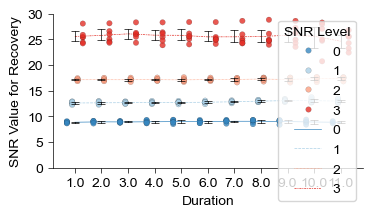

In [38]:
idx1 = np.where((np.isnan(SNRData['Conditional Recover Prob.']) == False) & (SNRData['Paradigm'] == 'MB'))[0]
SubData_mb = SubDict(SNRData, SNRData.keys(), idx=idx1)
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData_mb,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.0,
    zorder=1
)
ax.set_ylim(-2, 45)
ax.set_yticks(np.linspace(0, 40, 5))
plt.savefig(join(loc, "SNR - Recovery Prob [MB].png"), dpi=600)
plt.savefig(join(loc, "SNR - Recovery Prob [MB].svg"), dpi=600)
plt.show()

for dur in range(1, 12):
    values = [SubData_mb['Conditional Recover Prob.'][(SubData_mb['SNR Level'] == snr) & (SubData_mb['Duration'] == dur)] for snr in range(4)]
    print(f"Dur {dur}: {f_oneway(*values)}")
    
fig = plt.figure(figsize=(4, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'SNR Value for Recovery',
    data=SubData_mb,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.0,
    zorder=1
)
SubData_mb['Duration']-= 1
sns.lineplot(
    x = 'Duration',
    y = 'SNR Value for Recovery',
    data=SubData_mb,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    style = "SNR Level",
    err_style="bars",
    linewidth=0.5,
    err_kws={"capsize":3, 'capthick':0.5, 'elinewidth':0.5, 'ecolor':'k'},
    zorder=2,
)
ax.set_ylim(0, 30)
ax.set_yticks(np.linspace(0, 30, 7))
plt.savefig(join(loc, "SNR - Recovery SNR [MB - Sample SNRs].png"), dpi=600)
plt.savefig(join(loc, "SNR - Recovery SNR [MB - Sample SNRs].svg"), dpi=600)
plt.show()

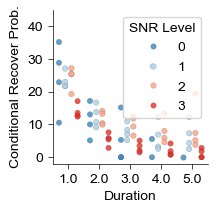

Dur 1: F_onewayResult(statistic=3.088566363301742, pvalue=0.06788872399803828)
Dur 2: F_onewayResult(statistic=3.8680243531839453, pvalue=0.037976615711649404)
Dur 3: F_onewayResult(statistic=2.2980723240285528, pvalue=0.12947255614972344)
Dur 4: F_onewayResult(statistic=1.0597784291406778, pvalue=0.4053182317094214)
Dur 5: F_onewayResult(statistic=2.2048134782911153, pvalue=0.15707384028169463)
Dur 6: F_onewayResult(statistic=nan, pvalue=nan)
Dur 7: F_onewayResult(statistic=nan, pvalue=nan)
Dur 8: F_onewayResult(statistic=nan, pvalue=nan)
Dur 9: F_onewayResult(statistic=nan, pvalue=nan)
Dur 10: F_onewayResult(statistic=nan, pvalue=nan)
Dur 11: F_onewayResult(statistic=nan, pvalue=nan)


C:\Users\Shuyang Yao\AppData\Local\Temp\ipykernel_5980\2622015831.py:29: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(f"Dur {dur}: {f_oneway(*values)}")


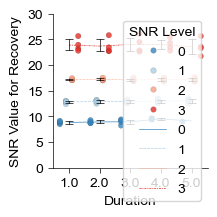

In [39]:
idx1 = np.where((np.isnan(SNRData['Conditional Recover Prob.']) == False) & (SNRData['Paradigm'] == 'HPf'))[0]
SubData_HPf = SubDict(SNRData, SNRData.keys(), idx=idx1)
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'Conditional Recover Prob.',
    data=SubData_HPf,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.0,
    zorder=1
)
ax.set_ylim(-2, 45)
ax.set_yticks(np.linspace(0, 40, 5))
plt.savefig(join(loc, "SNR - Recovery Prob [HPf].png"), dpi=600)
plt.savefig(join(loc, "SNR - Recovery Prob [HPf].svg"), dpi=600)
plt.show()

for dur in range(1, 12):
    values = [SubData_HPf['Conditional Recover Prob.'][(SubData_HPf['SNR Level'] == snr) & (SubData_HPf['Duration'] == dur)] for snr in range(4)]
    print(f"Dur {dur}: {f_oneway(*values)}")
    
fig = plt.figure(figsize=(2, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.stripplot(
    x = 'Duration',
    y = 'SNR Value for Recovery',
    data=SubData_HPf,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    edgecolor='black',
    size=4,
    linewidth=0.1,
    alpha=0.8,
    ax = ax,
    dodge=True,
    jitter=0.0,
    zorder=1
)
SubData_HPf['Duration']-= 1
sns.lineplot(
    x = 'Duration',
    y = 'SNR Value for Recovery',
    data=SubData_HPf,
    hue = "SNR Level",
    hue_order=[0, 1, 2, 3],
    palette = sns.color_palette("Blues", 2)[::-1] + sns.color_palette("Reds", 2),
    style = "SNR Level",
    err_style="bars",
    linewidth=0.5,
    err_kws={"capsize":3, 'capthick':0.5, 'elinewidth':0.5, 'ecolor':'k'},
    zorder=2,
)
ax.set_ylim(0, 30)
ax.set_yticks(np.linspace(0, 30, 7))
plt.savefig(join(loc, "SNR - Recovery SNR [HPf - Sample SNRs].png"), dpi=600)
plt.savefig(join(loc, "SNR - Recovery SNR [HPf - Sample SNRs].svg"), dpi=600)
plt.show()